In [13]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 

## Dataset : airbnb_2023.csv

In [14]:
# Loading data into panda dataframe
airbnb = pd.read_csv("../Resources/Reviews/airbnb_2023.csv")
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

C:\Users\skilu\AppData\Local\Temp\ipykernel_28608\1751329787.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv("../Resources/Reviews/airbnb_2023.csv")


In [15]:
# displaying the first 5 rows of the dataframe
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [16]:
# removing the columns that are not needed, selecting only the columns (features) that are needed
airbnb = airbnb.drop(columns=['name', 'host_name', 'neighbourhood_group','latitude','longitude','last_review','minimum_nights'])
airbnb.head()

,id,host_id,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,1169,Western Addition,Entire home/apt,202,383,2.31,1,128,59,San Francisco
1,5858,8904,Bernal Heights,Entire home/apt,235,111,0.66,1,365,0,San Francisco
2,8142,21994,Haight Ashbury,Private room,56,9,0.09,13,365,1,San Francisco
3,8339,24215,Western Addition,Entire home/apt,575,28,0.17,2,365,0,San Francisco
4,8739,7149,Mission,Private room,110,770,4.65,2,159,34,San Francisco


In [17]:
# Fill the missing values with 0
airbnb.fillna(0, inplace=True)

# Reduce the size of the dataframe to 500 rows to speed up the training
airbnb = airbnb[:500]

## Plotting the data

<Axes: xlabel='number_of_reviews', ylabel='price'>

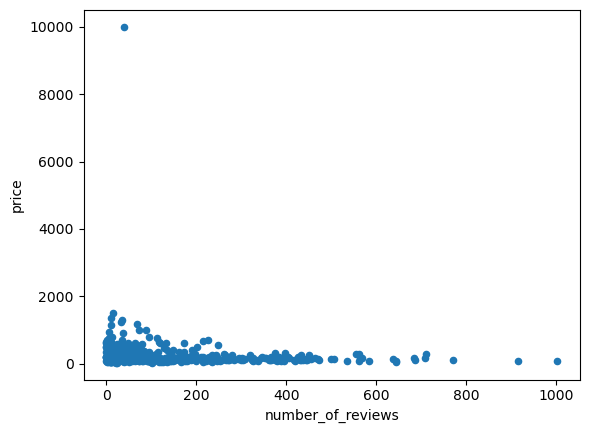

In [18]:
# Lets see if # of reviews has any relationship with price
airbnb.plot.scatter(x='number_of_reviews', y='price')

### 1. Price distribution
- Price distribution of the listings in the dataset
- Majority of the listings are priced below 500 or at least are the ones submitting reviews

<Axes: title={'center': 'number_of_reviews'}, xlabel='room_type'>

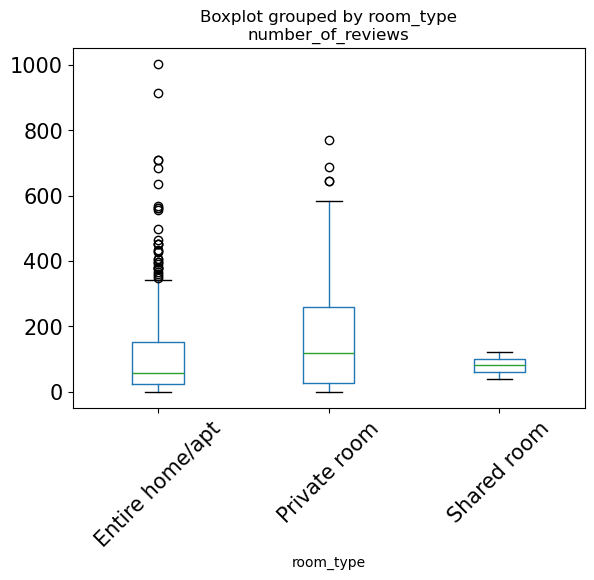

In [19]:
# Lets see if # of reviews has any relationship with room type
airbnb.boxplot(column='number_of_reviews', by='room_type', grid=False, rot=45, fontsize=15)

### 2. RoomType vs Rating
- Distribution of ratings for different room types
- Entire home/apt has the highest ratings

## Training and Testing the model

In [20]:
# First, we get the target variable (the "price" column)
y = airbnb["price"]

In [21]:
# Get the features we need except 'price'
X = airbnb.drop(columns=['id', 'host_id','price','neighbourhood','room_type','city'])
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   number_of_reviews               500 non-null    int64  
 1   reviews_per_month               500 non-null    float64
 2   calculated_host_listings_count  500 non-null    int64  
 3   availability_365                500 non-null    int64  
 4   number_of_reviews_ltm           500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB
None


,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,383,2.31,1,128,59
1,111,0.66,1,365,0
2,9,0.09,13,365,1
3,28,0.17,2,365,0
4,770,4.65,2,159,34


## Predict Testing Model

In [22]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Model and Fitting

In [23]:
# Create the support vector machine classifier model with a 'linear' kernel
model = SVC(kernel='linear')

In [24]:
# Fit the model to the training data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % model.score(X_train, y_train))
print('Test Accuracy: %.3f' % model.score(X_test, y_test))

Train Accuracy: 0.445
Test Accuracy: 0.016


In [26]:
# Make and save testing predictions with the saved SVM model using the testing data
testing_predictions = model.predict(X_test)

# Review the predictions
testing_predictions

array([ 70,  69, 150, 350,  99,  95, 390, 120, 150,  80, 575, 350,  95,
       150,  65, 899, 350, 150, 125,  55, 468, 150, 120, 150, 350, 125,
       395,  82, 130, 169,  70,  40,  32, 296, 575, 132, 150, 350, 185,
        53, 150,  85, 150, 575, 120, 350, 325, 575, 102, 130, 500, 102,
       162, 120,  97, 600, 160, 165, 350, 350, 150, 350, 150,  55, 125,
       295, 150,  88, 144, 104, 160, 189, 120,  53,  99, 350, 120,  95,
       153, 267, 120, 120, 695, 350, 389, 350, 136, 132, 100, 350,  80,
       468, 120, 600, 150, 162, 150, 144, 500, 220, 232,  86, 201, 192,
       100, 127, 166, 350,  82, 600, 350, 275,  98,  99, 207, 250, 120,
       123, 350, 350, 350, 120, 267, 195, 120], dtype=int64)

In [27]:
# Display the accuracy score for the testing dataset
accuracy_score(y_test, testing_predictions)

0.016

## Pedictions
- Unable to predict the price of the listings based on the reviews or saying that the reviews are not a good indicator of the price of the listings